In [1]:
import pickle
import pandas as pd

In [2]:
posts_file_path = os.path.join('..','..', 'data', "textblob_cleaned_sentiment.pkl")
pick_op = open(posts_file_path, 'rb')
textblob_df = pickle.load(pick_op)
textblob_df.rename(columns = {'sentiment':'textblob_sentiment', 'objectivity':'textblob_objectivity'}, inplace = True)
textblob_df.head()


,textblob_sentiment,textblob_objectivity
0,-0.200000,0.300000
1,0.000000,0.500000
2,0.000000,0.000000
3,-0.155556,0.288889
4,0.000000,0.000000


In [3]:
posts_file_path = os.path.join('..', '..', 'data', "all_sentiment_vader.pkl")
pick_op = open(posts_file_path, 'rb')
vader_df = pickle.load(pick_op)
vader_df.head()

,vader_neg,vader_neu,vader_pos,vader_compound
0,0.229,0.654,0.118,-0.4019
1,0.000,0.928,0.072,0.1027
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.189,0.811,0.000,-0.2732


In [4]:
sentiment_comp = pd.concat([vader_df, textblob_df], axis='columns')

In [7]:
del textblob_df
del vader_df
import gc
gc.collect()
posts_pkl_path = os.path.join('..', '..', 'data', "combined_bigquery_processed.pkl")
posts_df = pd.read_pickle(posts_pkl_path)

NameError: name 'textblob_df' is not defined

In [8]:
posts_df = posts_df['created_date']
posts_df.head()

0    2019-01-31
1    2019-02-03
2    2019-02-03
3    2019-02-02
4    2019-02-09
Name: created_date, dtype: object

In [10]:
sentiment_comp = sentiment_comp.merge(posts_df, left_index = True, right_index = True, how = 'left')

In [14]:
sentiment_comp['date'] = pd.to_datetime(sentiment_comp['created_date'], format='%Y-%m-%d')
sentiment_comp['date'] = sentiment_comp['date'].dt.date
sentiment_comp.head()

,vader_neg,vader_neu,vader_pos,vader_compound,textblob_sentiment,textblob_objectivity,created_date,date
0,0.229,0.654,0.118,-0.4019,-0.200000,0.300000,2019-01-31,2019-01-31
1,0.000,0.928,0.072,0.1027,0.000000,0.500000,2019-02-03,2019-02-03
2,0.000,1.000,0.000,0.0000,0.000000,0.000000,2019-02-03,2019-02-03
3,0.000,1.000,0.000,0.0000,-0.155556,0.288889,2019-02-02,2019-02-02
4,0.189,0.811,0.000,-0.2732,0.000000,0.000000,2019-02-09,2019-02-09


In [30]:
def plot_seven_day_moving_avg(df, cols, title, y_axis, counts=False, window = 7):
    import matplotlib.pyplot as plt
    import datetime as dt
    plot_cols = []
    plot_df = pd.DataFrame()
    for col in cols:
        if counts:
            compound_date = df.groupby(['date'])[col].size().reset_index()
            compound_date.set_index('date', inplace=True)
        else:
            compound_date = df.groupby(['date'])[col].mean().reset_index()
            compound_date.set_index('date', inplace=True)
        plot_df['7_day_avg_' + col] = (compound_date[col].rolling(window=window).mean())
        # plot_cols.append(['7_day_avg_' + col])
    print(plot_df)
    plt.figure(figsize=(20,6))
    plot_df.plot(linewidth=0.5)
    plt.ylabel(y_axis, size=15)
    plt.xlabel("Date", size=15)
    plt.title(title, size=18)
    plt.axvline(dt.datetime(2019, 6, 26))

            7_day_avg_vader_compound  7_day_avg_textblob_sentiment
date                                                              
2018-12-31                       NaN                           NaN
2019-01-01                       NaN                           NaN
2019-01-02                       NaN                           NaN
2019-01-03                       NaN                           NaN
2019-01-04                       NaN                           NaN
...                              ...                           ...
2019-12-27                  0.007563                      0.048994
2019-12-28                  0.008084                      0.049112
2019-12-29                  0.005061                      0.048308
2019-12-30                  0.001927                      0.047811
2019-12-31                 -0.005160                      0.046165

[366 rows x 2 columns]


<Figure size 1440x432 with 0 Axes>

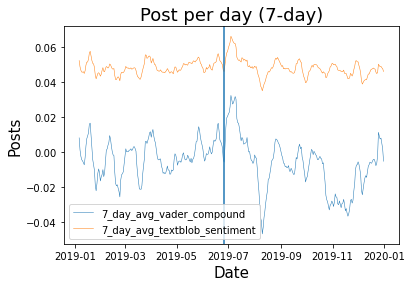

In [32]:
plot_seven_day_moving_avg(sentiment_comp, ['vader_compound', 'textblob_sentiment'], 'Avg sentiment per day (7-day)', 'Posts')